In [3]:
import pickle
import random
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

MAX_POLY = 30

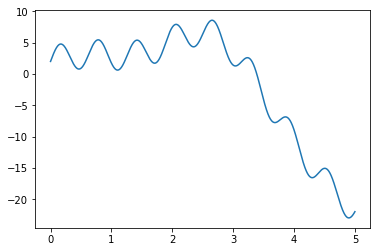

In [4]:
f = open("data.pkl", "rb")
raw = pickle.load(f)
plt.plot(raw[:,0], raw[:,1])
np.random.shuffle(raw)



In [5]:
training_size = len(raw) // 10 * 9
training_set = raw[:training_size]
print(training_set[:5])


[[ 2.562       7.65770359]
 [ 1.534       4.18499611]
 [ 0.674       4.19795476]
 [ 3.453      -2.39410523]
 [ 0.449       0.81921123]]


In [6]:
test_set = raw[training_size:]
print(test_set[:5])

[[  4.698      -18.74004502]
 [  1.334        4.57888166]
 [  1.159        0.99635172]
 [  2.209        6.02929262]
 [  2.836        5.01662736]]


In [7]:
assert(len(training_set) + len(test_set) == len(raw))

In [8]:
partition_size = len(training_set) // 10
print(training_set[:5])

[[ 2.562       7.65770359]
 [ 1.534       4.18499611]
 [ 0.674       4.19795476]
 [ 3.453      -2.39410523]
 [ 0.449       0.81921123]]


In [9]:
# for l in range(1, 10):
#     for i in range(10):
#         x = []
#         y = []
#         for j in range(len(samplingData[i])):
#             xList = []

#             for m in range(1, l + 1):
#                 xList.append(samplingData[i][j][0] ** m)
#             x.append(xList)

#             y.append(samplingData[i][j][1])
#         regrModel = linear_model.LinearRegression()

#         regrModel.fit(x, y)
#         xTest = []
#         xTestPlot = []
#         yTest = []
#         for k in range(len(testData)):
#             xTestList = []
#             xTestPlot.append(testData[k][0])
#             for m in range(1, l + 1):
#                 xTestList.append(testData[k][0] ** m)
#             xTest.append(xTestList)
#             yTest.append(testData[k][1])
#             yPred = regrModel.predict(xTest)
#             yTrain = regrModel.predict(x)

#         plt.scatter(xTestPlot, yTest)
#         plt.plot(xTestPlot, yPred)
#         plt.show()

In [10]:
test_xs = test_set[:, :1]
test_ys = test_set[:, 1]

degree_vs_bias = np.zeros(shape=(MAX_POLY,2))

for degree in range(1,MAX_POLY + 1):

    test_poly_xs = np.zeros(shape=(test_set.shape[0], degree))
    for row in range(test_set.shape[0]):
        test_poly_xs[row] = np.concatenate(
            list(test_xs[row] ** i for i in range(1, degree + 1))
        )

    predicted = np.zeros(shape=(test_set.shape[0], 10))

    for set_idx in range(10):
        lo = set_idx * partition_size
        hi = (set_idx + 1) * partition_size

        cur_training = training_set[lo:hi]
        train_xs = cur_training[:, :1]
        train_ys = cur_training[:, 1]
        poly = np.zeros(shape=(cur_training.shape[0], degree))
        for row in range(cur_training.shape[0]):
            np.concatenate(
                list(train_xs[row] ** i for i in range(1, degree + 1)), out=poly[row]
            )

        model = linear_model.LinearRegression(normalize=True)

        model.fit(poly, train_ys)

        predicted[:, set_idx] = model.predict(test_poly_xs)

    expected_val = np.sum(predicted, axis=1) / 10
    assert expected_val.shape == test_ys.shape
    degree_vs_bias[degree - 1,0] = (
        np.sum((expected_val - test_ys) ** 2) / expected_val.shape
    )

    print("degree {} bias = {}".format(degree, degree_vs_bias[degree - 1][0]))

    
#     print(predicted[1], expected_val[1])
    variance = np.sum((predicted - np.repeat(expected_val.reshape(500,1), 10, axis=1)) ** 2, axis=1) / 10
#     print("diff", np.sum((predicted - np.repeat(expected_val.reshape(500,1), 10, axis=1)) ** 2, axis=1) / 10)
#     print(variance.shape)
    variance = np.sum(variance) / test_set.shape[0]
#     print(variance)
    degree_vs_bias[degree - 1, 1] = variance
   




degree 1 bias = 30.104013174571797
degree 2 bias = 6.078359166036751
degree 3 bias = 5.2094549474878695
degree 4 bias = 3.107299740278441
degree 5 bias = 2.9920510848681205
degree 6 bias = 2.675865970489197
degree 7 bias = 2.615197565833529
degree 8 bias = 2.628131521027949
degree 9 bias = 2.634055428428791
degree 10 bias = 2.6271096057458156
degree 11 bias = 2.4364664481206044
degree 12 bias = 2.4371779369776045
degree 13 bias = 2.197311490663652
degree 14 bias = 2.1870168524082625
degree 15 bias = 2.1818002761316184
degree 16 bias = 2.2058036444133715
degree 17 bias = 1.7807117481284684
degree 18 bias = 1.7858737318485813
degree 19 bias = 1.7870653630165956
degree 20 bias = 1.7978126805176502
degree 21 bias = 1.1743416435826848
degree 22 bias = 1.2091584186319262
degree 23 bias = 1.188066051365487
degree 24 bias = 1.0071509277615682
degree 25 bias = 0.8427924930318331
degree 26 bias = 0.6375467973631139
degree 27 bias = 0.7362928544158367
degree 28 bias = 0.7720707662744593
degree 29

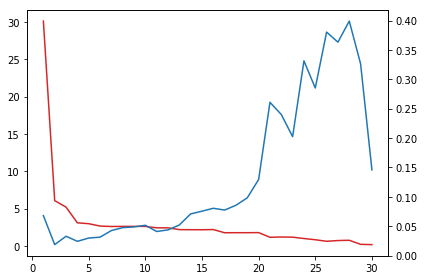

In [17]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(1, MAX_POLY + 1)), degree_vs_bias[:,0], color=color)
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(1,MAX_POLY + 1)), degree_vs_bias[:,1], color=color)
fig.tight_layout()
plt.show()

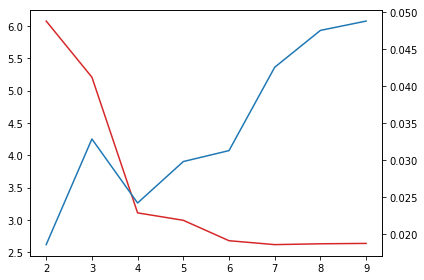

In [20]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(2, 10)), degree_vs_bias[:,0][1:9], color=color)
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(2,10)), degree_vs_bias[:,1][1:9], color=color)
fig.tight_layout()
plt.show()